All Rows and Columns of the Retail Sales Dataset:
                  Retail_Sales
observation_date              
1992-01-01              146925
1992-02-01              147223
1992-03-01              146805
1992-04-01              148032
1992-05-01              149010
1992-06-01              149800
1992-07-01              150761
1992-08-01              151067
1992-09-01              152588
1992-10-01              153521
1992-11-01              153583
1992-12-01              155614
1993-01-01              157555
1993-02-01              156266
1993-03-01              154752
1993-04-01              158979
1993-05-01              160605
1993-06-01              160127
1993-07-01              162816
1993-08-01              162506
1993-09-01              163258
1993-10-01              164685
1993-11-01              166594
1993-12-01              168161
1994-01-01              167518
1994-02-01              169649
1994-03-01              172766
1994-04-01              173106
1994-05-01          

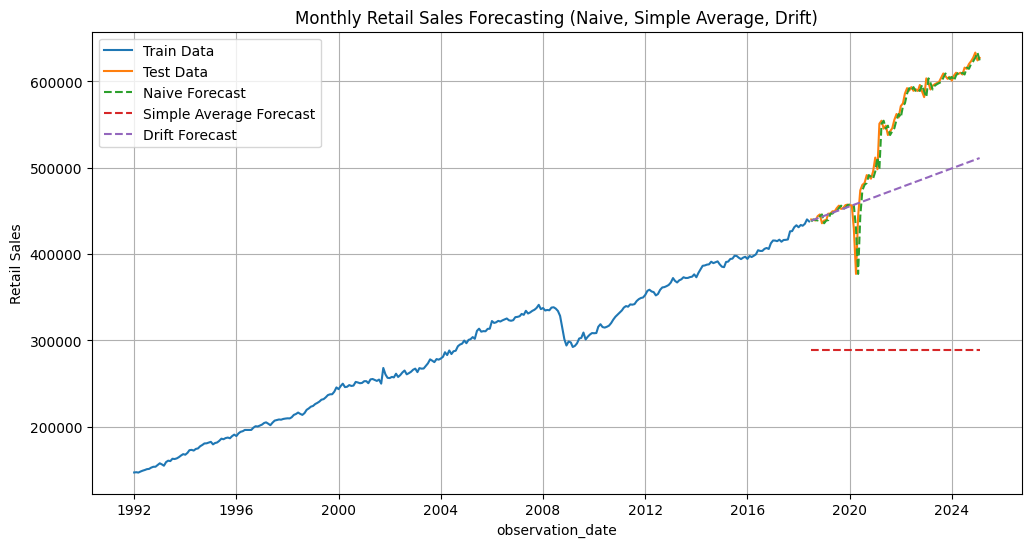


Forecast Evaluation (on Test Set):
Naive - MSE: 180996502.64, RMSE: 13453.49
Simple Average - MSE: 66917463775.06, RMSE: 258684.10
Drift - MSE: 6501423374.95, RMSE: 80631.40

Test Set with Forecasts:
                  Retail_Sales  Naive_Forecast  Simple_Average_Forecast  \
observation_date                                                          
2018-07-01              440024        437762.0            288590.251572   
2018-08-01              439439        440024.0            288590.251572   
2018-09-01              438880        439439.0            288590.251572   
2018-10-01              443924        438880.0            288590.251572   
2018-11-01              445847        443924.0            288590.251572   
2018-12-01              435613        445847.0            288590.251572   
2019-01-01              438860        435613.0            288590.251572   
2019-02-01              439249        438860.0            288590.251572   
2019-03-01              446687        439249.0   

C:\Users\USER\AppData\Local\Temp\ipykernel_7596\511109455.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Naive_Forecast'] = y_pred_naive['Retail_Sales']
C:\Users\USER\AppData\Local\Temp\ipykernel_7596\511109455.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Simple_Average_Forecast'] = y_pred_sma['Simple_Average']
C:\Users\USER\AppData\Local\Temp\ipykernel_7596\511109455.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

# Load the Monthly Retail Sales Data from FRED
file_path = 'C:/Users/USER/Downloads/RSXFS.csv'
try:
    df = pd.read_csv(file_path, parse_dates=['observation_date'], index_col='observation_date')
    df.columns = ['Retail_Sales']
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the retail sales dataset is in your Downloads folder.")
    exit()

# Enable showing all rows and columns (optional)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("All Rows and Columns of the Retail Sales Dataset:")
print(df)

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# 1. Naive Method
y_pred_naive = test.shift(1)
y_pred_naive.iloc[0] = train['Retail_Sales'].iloc[-1] # Forecast the first test point with the last training point

# 2. Simple Average Method
y_pred_sma = pd.DataFrame(index=test.index)
y_pred_sma['Simple_Average'] = train['Retail_Sales'].mean()

# 3. Drift Method
# Calculate the drift (average change over the training period)
delta_y = train['Retail_Sales'].iloc[-1] - train['Retail_Sales'].iloc[0]
n = len(train)
drift = delta_y / (n - 1) if n > 1 else 0

y_pred_drift = pd.DataFrame(index=test.index)
last_value = train['Retail_Sales'].iloc[-1]
for i in range(len(test)):
    y_pred_drift.loc[test.index[i], 'Drift'] = last_value + (i + 1) * drift

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Retail_Sales'], label='Train Data')
plt.plot(test.index, test['Retail_Sales'], label='Test Data')
plt.plot(y_pred_naive.index, y_pred_naive['Retail_Sales'], label='Naive Forecast', linestyle='--')
plt.plot(y_pred_sma.index, y_pred_sma['Simple_Average'], label='Simple Average Forecast', linestyle='--')
plt.plot(y_pred_drift.index, y_pred_drift['Drift'], label='Drift Forecast', linestyle='--')
plt.title('Monthly Retail Sales Forecasting (Naive, Simple Average, Drift)')
plt.xlabel('observation_date')
plt.ylabel('Retail Sales')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate (Optional - for comparison, not strictly required by the prompt)
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_forecast(y_true, y_pred, method):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'{method} - MSE: {mse:.2f}, RMSE: {rmse:.2f}')

print("\nForecast Evaluation (on Test Set):")
evaluate_forecast(test['Retail_Sales'], y_pred_naive['Retail_Sales'], 'Naive')
evaluate_forecast(test['Retail_Sales'], y_pred_sma['Simple_Average'], 'Simple Average')
evaluate_forecast(test['Retail_Sales'], y_pred_drift['Drift'], 'Drift')

# Add forecast columns to the test set for display
test['Naive_Forecast'] = y_pred_naive['Retail_Sales']
test['Simple_Average_Forecast'] = y_pred_sma['Simple_Average']
test['Drift_Forecast'] = y_pred_drift['Drift']

print("\nTest Set with Forecasts:")
print(test)

print("\nRemember to complete the Excel part of the assignment and write your reflection comparing Excel, R, and Python for basic forecasting.")